<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


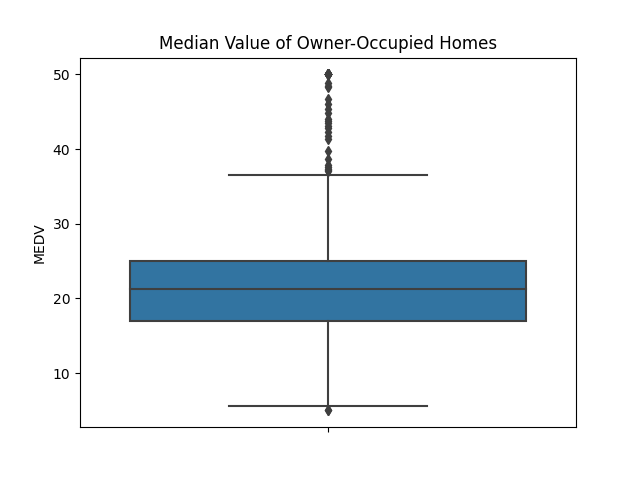

In [5]:
##Question 1: For the 'Median value of owner-occupied homes' provide a boxplot
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Median Value of Owner-Occupied Homes')

plt.show()
## the following shows a boxplot of the variable 'MEDV'.  Observations of the plot: the median is approximately 21; Upper quartile is approx 25; Lower quartile is approx 18; Max approx 37; Min approx 4; Multiple outliers

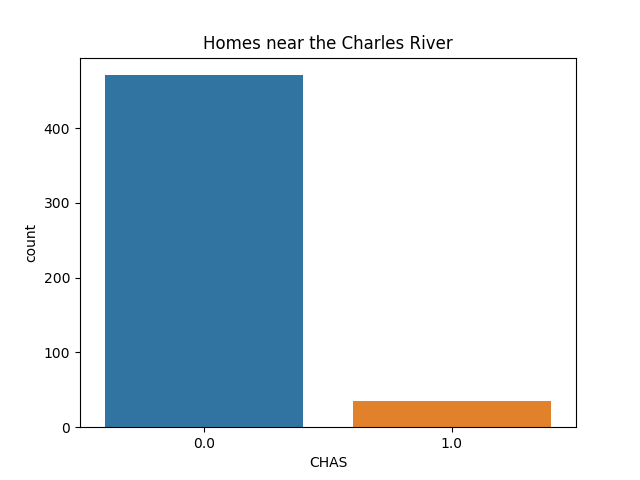

In [6]:
##Question 2: Provide a histogram for the Charles River variable
sns.countplot(x = 'CHAS', data=boston_df)
plt.title('Homes near the Charles River')

plt.show()
## the bar plot shows that significantly more homes are not (shown as 0.0) near the Charles River. 

In [7]:
##Question 3: Provide a boxplot for the MEDV variable vs the AGE variable - Discretize the age variable into three groups of 35 years and younger, between 35 and 50 years and older
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

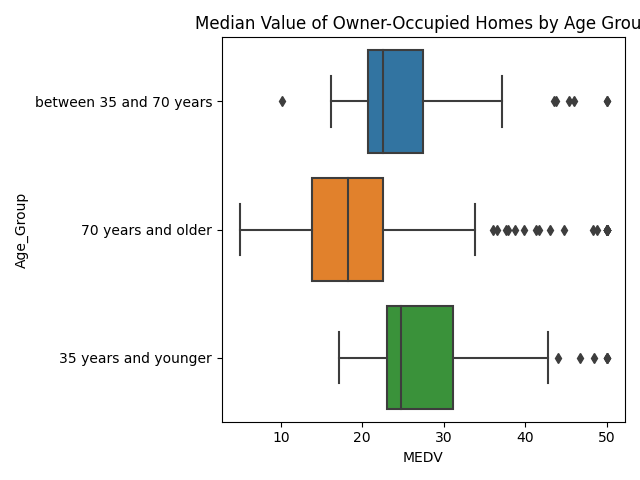

In [8]:
sns.boxplot(x='MEDV', y='Age_Group', data=boston_df)
plt.title('Median Value of Owner-Occupied Homes by Age Group')
plt.tight_layout()
plt.show()
# The plot shows that 35 years and younger people tend to have more expensive homes than 70 years and older.  

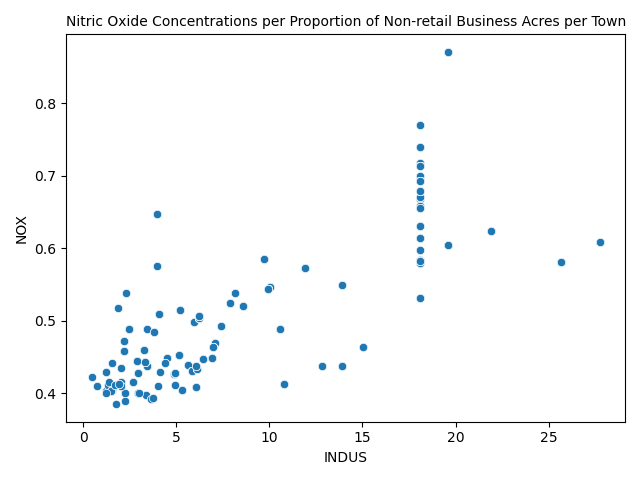

In [9]:
##Question 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Nitric Oxide Concentrations per Proportion of Non-retail Business Acres per Town', fontsize = 10) 
plt.tight_layout()

plt.show()
## it looks as if there is a positive correlation between nitric oxide concentrations when there is a higher acreage of non-retail business in a town

<ipython-input-10-87562773ebd6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df['PTRATIO'], kde=False)


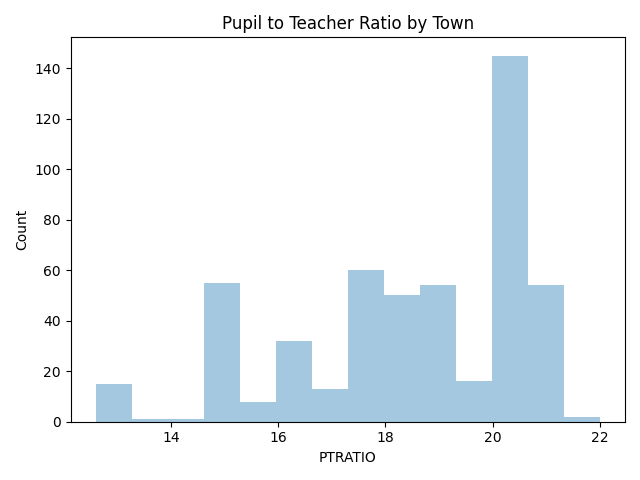

In [10]:
##Question 5: Create a histogram for the pupil to teacher ratio variable
sns.distplot(boston_df['PTRATIO'], kde=False)
plt.title('Pupil to Teacher Ratio by Town')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

## The histogram shows the most common ratio is approximately 21 students per teacher

In [11]:
##Question 6: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

## the p-value is less than 0.05. Therefore, the null hypothesis is rejected and one can conclude there is a statistically significant difference in median value of houses depending on proximity to the Charles river. 

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [12]:
##Question 7: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

## the p-value is less than 0.05.  Therefore, the null hypothesis is rejected and one can conclude there is a statistically significant difference in median value of homes based on whether or not they were built prior to 1940. 

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


In [13]:
##Question 8: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

## the p-value is less than 0.05 with a Pearson coefficient of .76.  Therefore, the null hypothesis is rejected and one can conclude there is a statistically signifcant positive correlation between nitric oxide concentrations and the proportion of non-retail business acres in the town.

(0.7636514469209189, 7.913361061211254e-98)

In [14]:
##Question 9: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

## With a p-value less than 0.05, one can conclude that the additional weighted sitance to the 5 employment centers in boston increases the median value of owner occupied homes by 1.0916.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           1.21e-08
Time:                        17:37:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""